In [1]:
import numpy as np
import pandas as pd
import os, pickle
import matplotlib.pyplot as plt
from preprocessors import preprocess_timestamp_and_columns, plot_preprocessed_parquets
from tqdm import tqdm

# 기본적인 Preprocessing
- Min, Max Scaling per column (Voltage, Current, SOC, Temperature, VoltageGap)
- scaling 범위를 넘어선 df 제외
- df 길이 짧은 것 (계측 기간 불량) 제외
- 저장 위치와 형식 : /data/ess/data/incell/year45_preprocessed/데이터셋이름/yyyymmdd.parquet
- 제외 df 기록 위치 : /data/ess/data/incell/year45_preprocessed/errors_데이터셋이름.txt
- 데이터셋 이름 : 1(시온유), 2(판리), 3a(황금6호), 4a(백마)
### 이슈사항
- 백마 : 기록 이슈가 있어서 2024.6부터만 전처리함

In [2]:
for name in ["1", "2", "3a", "4a"]:
    print(name)
    
    if name == "4a":
        preprocess_timestamp_and_columns(root_dir=f"/data/ess/data/incell/ess-bucket-{name}/for_preprocess",
                                            dataset_name=name,
                                            save_root_dir=f"/data/ess/data/incell/year45_preprocessed/")
    else:
        preprocess_timestamp_and_columns(root_dir=f"/data/ess/data/incell/ess-bucket-{name}",
                                            dataset_name=name,
                                            save_root_dir=f"/data/ess/data/incell/year45_preprocessed/")
    

1
202109
202110
202111
202112
202201
202202
202203
202204
202205
202206
202207
202208
202209
202210
202211
202212
202301
202302
202303
202304
Elapsed Time : 225.63757920265198
2
202203
202204
202205
202206
202207
202208
202209
202210
202211
202212
202301
202302
202303
202304
202305
202306
202307
202308
202309
202310
202311
202312
202401
202402
202403
202404
202405
202406
Elapsed Time : 465.0474934577942
3a
202301
202302
202303
202304
202305
202306
202307
Elapsed Time : 87.5445499420166
4a
202406
202407
Elapsed Time : 25.137367486953735


### 추가 전처리 사항 확인
- 주요 column 최대/최소 수집 후 plot 확인
- 주황색 : 최댓값, 파란색 : 최솟값

1
reading parquets...


100%|██████████| 363/363 [00:04<00:00, 79.00it/s]


start plotting...
2
reading parquets...


100%|██████████| 572/572 [00:07<00:00, 79.33it/s]


start plotting...
3a
reading parquets...


100%|██████████| 140/140 [00:01<00:00, 81.61it/s]


start plotting...
4a
reading parquets...


100%|██████████| 39/39 [00:00<00:00, 74.16it/s]


start plotting...


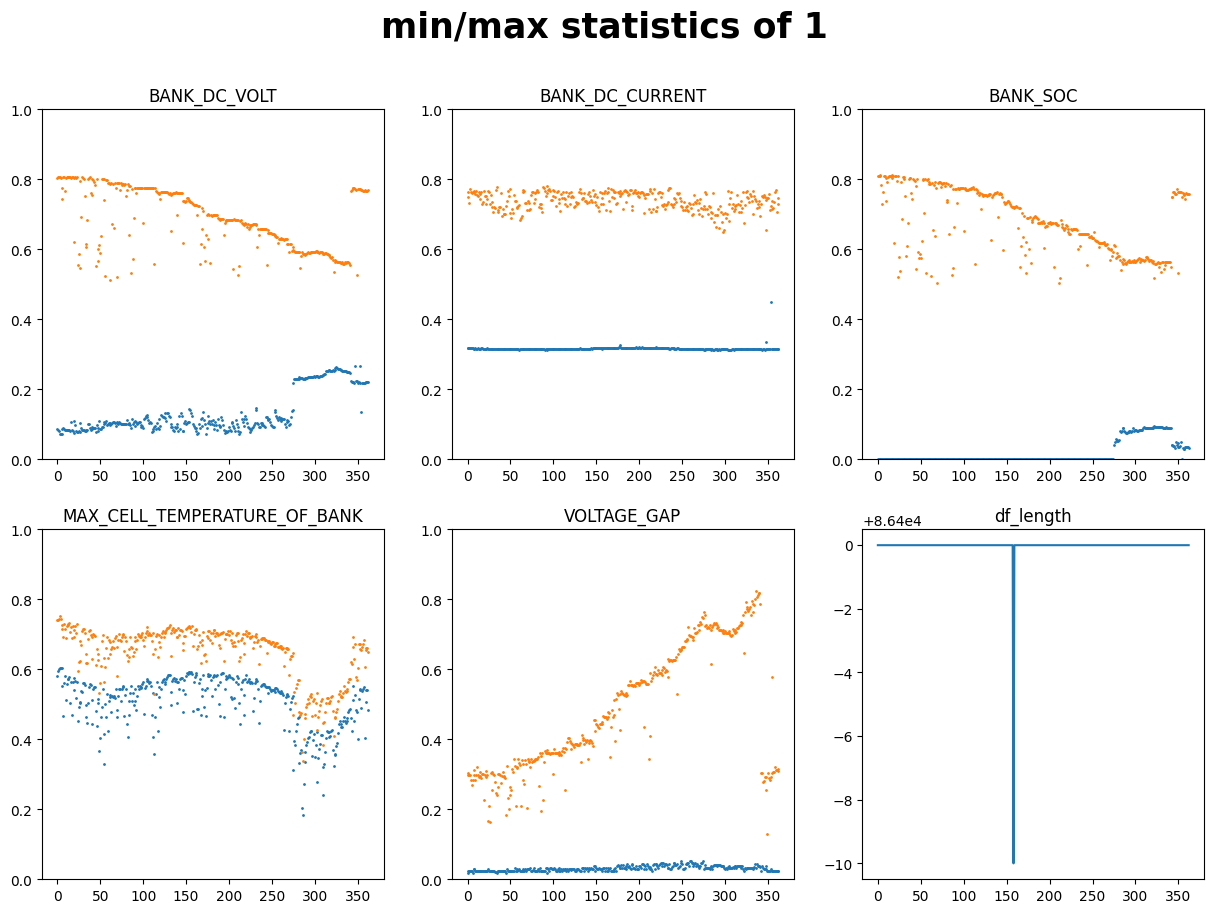

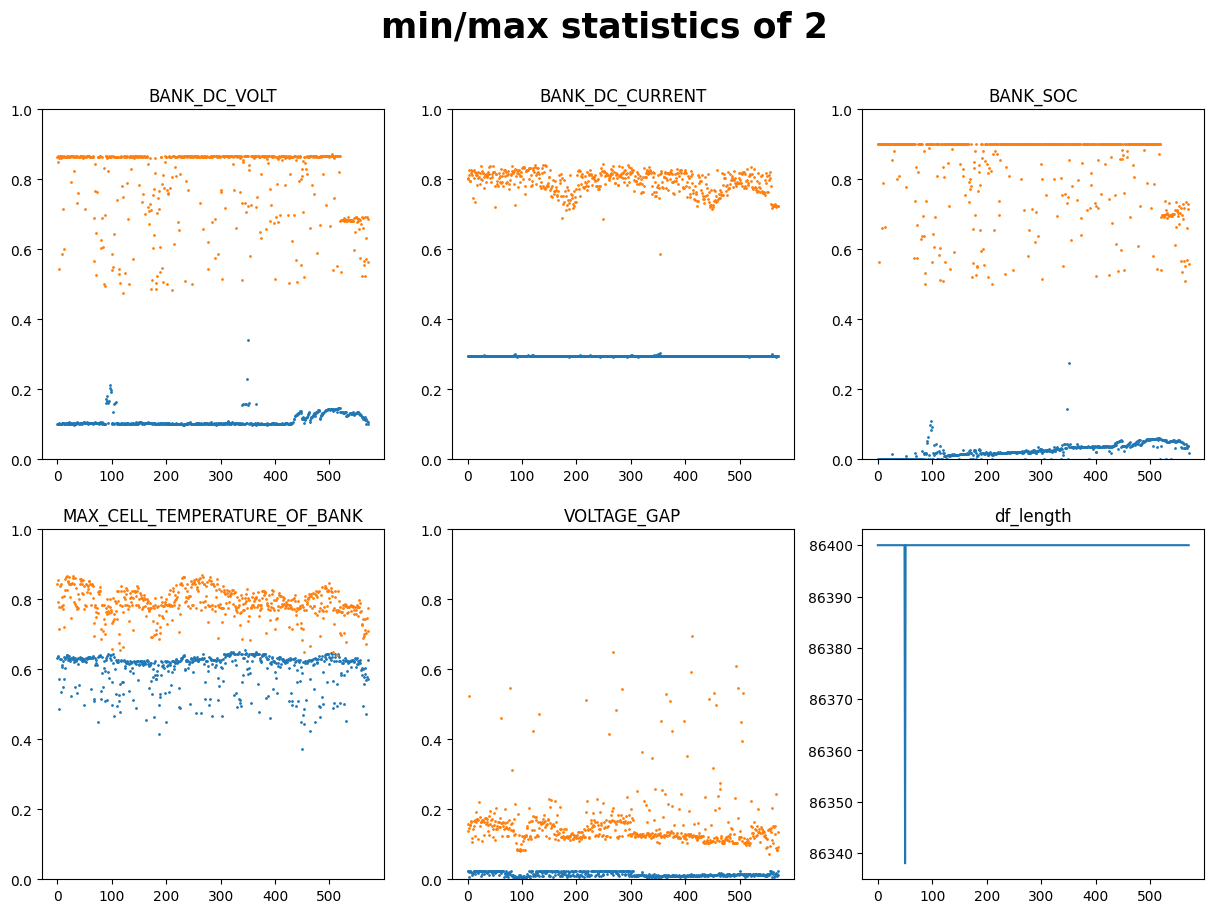

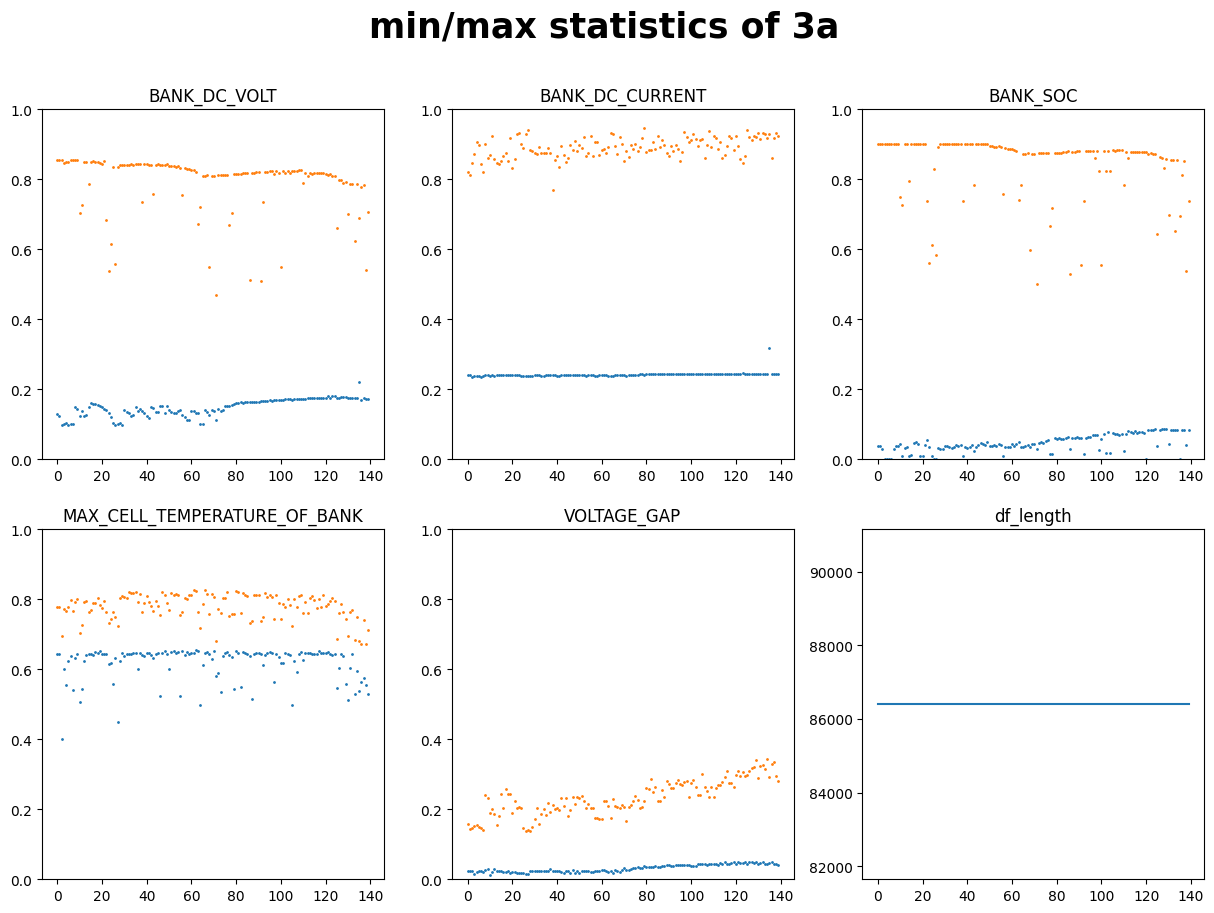

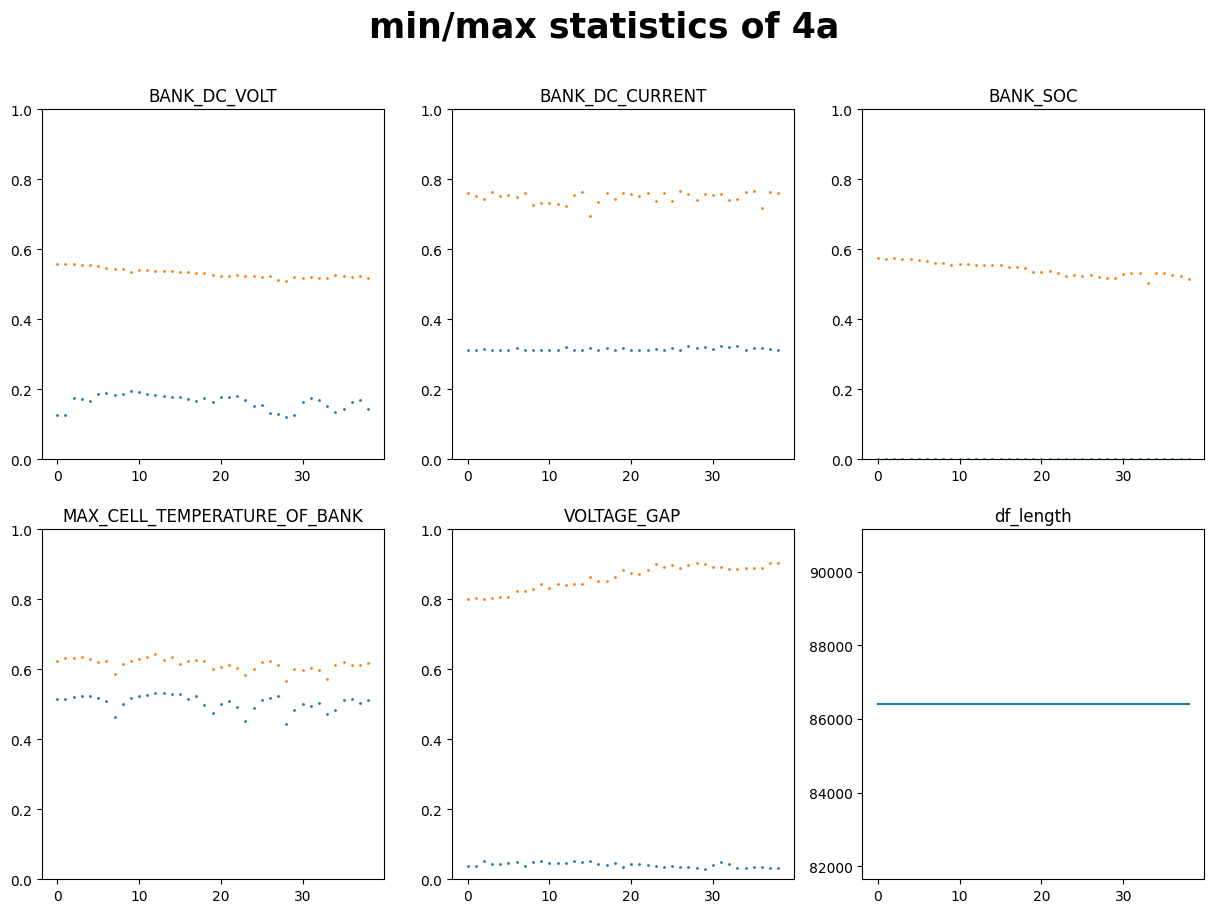

In [3]:
root_path = '/data/ess/data/incell/year45_preprocessed'
plot_preprocessed_parquets(root_path=root_path,
                           save_plot_path = ".",
                           save_names_path = ".")

## 합성 Voltage Gap 생산
- preprocessors.py의 synthesize_voltage_gap 함수 사용
- 전처리한 parquet file 기준으로 작성함

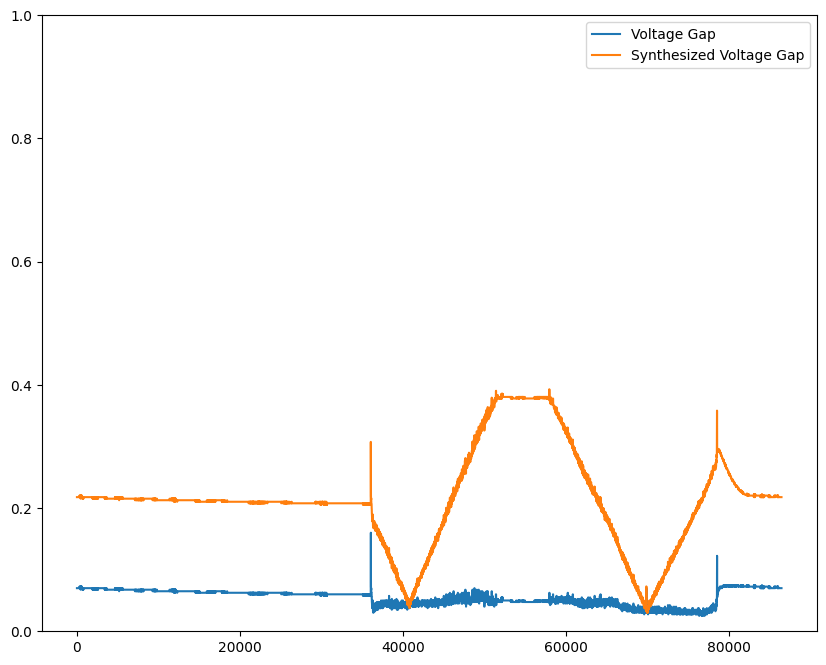

In [2]:
# 합성할 parquet file 불러오기
df = pd.read_parquet("/data/ess/data/incell/year45_preprocessed/2/20220930.parquet", engine="pyarrow")

# 전류, 전압, 셀전압차 불러옴
I = df["BANK_DC_CURRENT"].copy()
V = df["BANK_DC_VOLT"].copy()
Vgap= df["VOLTAGE_GAP"].copy()

from preprocessors import synthesize_voltage_gap
newVgap = synthesize_voltage_gap(V, I, Vgap)

# 합성한 결과 확인
plt.figure(figsize=(10,8))
plt.plot(Vgap, label="Voltage Gap")
plt.plot(newVgap, label="Synthesized Voltage Gap")
plt.ylim([0,1])
plt.legend()




